In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
from tqdm import tqdm

In [4]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras import backend as K

In [5]:
class Model():
    def __init__(self):
        K.set_learning_phase(0)
        self.model = ResNet50()
        self.input_size = (224, 224)
        
    def run_on_batch(self, x):
        return self.model.predict(x)

In [6]:
from keras.preprocessing import image

In [7]:
def load_img(path):
    img = image.load_img(path, target_size=model.input_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [8]:
def generate_masks(N, s, p1):
    cell_size = np.ceil(np.array(model.input_size) / s)
    up_size = (s + 1) * cell_size

    grid = np.random.rand(N, s, s) < p1
    grid = grid.astype('float32')

    masks = np.empty((N, *model.input_size))

    for i in tqdm(range(N), desc='Generating masks'):
        # Random shifts
        x = np.random.randint(0, cell_size[0])
        y = np.random.randint(0, cell_size[1])
        # Linear upsampling and cropping
        masks[i, :, :] = resize(grid[i], up_size, order=1, mode='reflect',
                                anti_aliasing=False)[x:x + model.input_size[0], y:y + model.input_size[1]]
    masks = masks.reshape(-1, *model.input_size, 1)
    return masks

In [9]:
batch_size = 100

def explain(model, inp, masks):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
        print('np.concatenate(preds).shape', np.concatenate(preds).shape)
        print('masks.shape', masks.shape)    
    preds = np.concatenate(preds)
    sal = preds.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)
    sal = sal / N / p1
    return sal

In [10]:
def explain2(model, inp, reference_inp, masks):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
    preds = np.concatenate(preds)

    reference_pred = model.run_on_batch(reference_inp)
    distances = pairwise_distances(preds, reference_pred, metric='cosine') / 2
    print('distances.shape', distances.shape)

    sal = distances.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)

    sal = sal / N / p1
    return sal

In [11]:
def explain3(model, inp, reference_inp, masks, batch_size=10):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    N = len(masks)
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(2*model.run_on_batch(masked[i:min(i+batch_size, N)]) -1)
    preds = np.concatenate(preds)

    reference_pred = model.run_on_batch(reference_inp)
    distances = pairwise_distances(preds, reference_pred, metric='cosine') / 2
    print('distances.shape', distances.shape)

    sal = distances.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)

    sal = sal / N / p1
    return sal

In [12]:
from keras.backend import concatenate
import scipy


u = np.array([[1,0]])
v = np.array([[-1,0]])

# [for e in v]
w = np.concatenate((u,v))

scipy.spatial.distance.cosine(u, v, w=None)

2.0

In [13]:
from sklearn.metrics import pairwise_kernels, pairwise_distances
pairwise_distances(u, w, metric='cosine')

array([[0., 2.]])

In [14]:
def class_name(idx):
    return decode_predictions(np.eye(1, 1000, idx))[0][0][1]

In [15]:


model = Model()



/Users/pbos/sw/miniconda3/envs/dianna/lib/python3.9/site-packages/keras/backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [16]:
!wget https://www.lomondhillslabradoodles.co.uk/wp-content/uploads/2018/12/IMG_4531-e1549365547619.jpg

--2022-04-20 11:17:07--  https://www.lomondhillslabradoodles.co.uk/wp-content/uploads/2018/12/IMG_4531-e1549365547619.jpg
Resolving www.lomondhillslabradoodles.co.uk (www.lomondhillslabradoodles.co.uk)... 185.3.164.157
Connecting to www.lomondhillslabradoodles.co.uk (www.lomondhillslabradoodles.co.uk)|185.3.164.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 783182 (765K) [image/jpeg]
Saving to: ‘IMG_4531-e1549365547619.jpg.1’

IMG_4531-e154936554 100%[===================>] 764.83K  --.-KB/s    in 0.1s    

2022-04-20 11:17:07 (7.44 MB/s) - ‘IMG_4531-e1549365547619.jpg.1’ saved [783182/783182]



In [17]:
!wget https://www.keystonepuppies.com/wp-content/uploads/2019/05/Tike-Mini-Labradoodle.jpg

--2022-04-20 11:17:07--  https://www.keystonepuppies.com/wp-content/uploads/2019/05/Tike-Mini-Labradoodle.jpg
Resolving www.keystonepuppies.com (www.keystonepuppies.com)... 67.227.148.146
Connecting to www.keystonepuppies.com (www.keystonepuppies.com)|67.227.148.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72816 (71K) [image/jpeg]
Saving to: ‘Tike-Mini-Labradoodle.jpg.1’

Tike-Mini-Labradood 100%[===================>]  71.11K   285KB/s    in 0.2s    

2022-04-20 11:17:08 (285 KB/s) - ‘Tike-Mini-Labradoodle.jpg.1’ saved [72816/72816]



In [18]:
urls = ['https://www.keystonepuppies.com/wp-content/uploads/2019/05/Tike-Mini-Labradoodle.jpg',
        'http://pinelodgelabradoodles.com/wp-content/uploads/2018/03/Katie_sq.jpg']
dog1_file_name = 'Tike-Mini-Labradoodle.jpg'
dog2_file_name = 'IMG_4531-e1549365547619.jpg'
# flowers_file_name = 'mc-farm-fresh-flowers-farmers-markets-20150915'

img_dog1, x_dog1 = load_img(dog1_file_name)
img_dog2, x_dog2 = load_img(dog2_file_name)
# img_flowers, x_flowers = load_img(flowers_file_name)


In [19]:
emb_dog1 = model.run_on_batch(x_dog1)
emb_dog2 = model.run_on_batch(x_dog2)
# emb_flowers = model.run_on_batch(x_flowers)

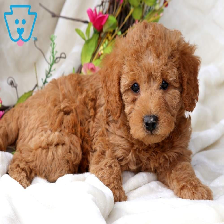

In [20]:
img_dog1

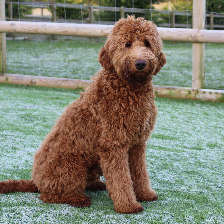

In [21]:
img_dog2

In [22]:
# img_flowers

In [23]:
N = 100
s = 8
p1 = 0.5
masks = generate_masks(N, s, p1)

Generating masks: 100%|██████████| 100/100 [00:00<00:00, 283.65it/s]


In [26]:
sal = explain3(model, x_dog1, x_dog2, masks)

Explaining: 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

distances.shape (100, 1)


In [27]:
sal.shape


(1, 224, 224)

c*N . N*d => c*d
1*N . N*d => 1*d

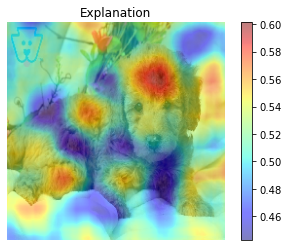

In [28]:
plt.title('Explanation')
plt.axis('off')
plt.imshow(img_dog1)
plt.imshow(sal[0], cmap='jet', alpha=0.5) #, vmin=0, vmax=1)
plt.colorbar()
plt.show()

Let's see what happens with different individual masks. Again without the 2*preds - 1 from explain3, that was maybe not a good idea.

In [29]:
inp = x_dog1
reference_inp = x_dog2

preds = []
# Make sure multiplication is being done for correct axes
masked = inp * masks
N = len(masks)
for i in tqdm(range(0, N, batch_size), desc='Explaining'):
    preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
preds = np.concatenate(preds)

Explaining: 100%|██████████| 1/1 [00:05<00:00,  5.84s/it]


In [30]:
reference_pred = model.run_on_batch(reference_inp)
distances = pairwise_distances(preds, reference_pred, metric='cosine') / 2
print('distances.shape', distances.shape)

sal = distances.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)

sal = sal / N / p1

distances.shape (100, 1)


In [31]:
preds.shape

(100, 1000)

In [32]:
preds.argmax(axis=-1)

array([184, 184, 267, 219, 219, 265, 219, 219, 267, 265, 265, 191, 219,
       219, 266, 184, 219, 265, 265, 219, 267, 191, 191, 219, 267, 265,
       267, 267, 184, 266, 283, 219, 267, 184, 219, 266, 219, 267, 219,
       219, 184, 219, 207, 184, 219, 266, 219, 267, 219, 266, 184, 219,
       265, 219, 876, 219, 184, 191, 267, 267, 191, 332, 219, 265, 267,
       267, 265, 219, 267, 191, 267, 267, 219, 219, 188, 266, 189, 219,
       191, 156, 191, 267, 266, 191, 191, 189, 219, 191, 219, 219, 267,
       191, 267, 265, 207, 265, 267, 267, 219, 219])

Ok, so we mostly get 267 or things there about as the max prediction, which is probably a poodle or something... https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a indeed, "standard poodle", 265 is "toy poodle", 266 is "miniature poodle", etc.

In [33]:
import pandas as pd

In [34]:
def class_name(idx):
    return decode_predictions(np.eye(1, 1000, idx))[0][0][1]

In [35]:
def histogram_of_top_predictions(predictions):
    count, label_indices = np.histogram(predictions.argmax(axis=-1), bins=1000, range=(0, 1000))
    label_indices = label_indices[:-1]
    # non-empty stuff:
    label_indices = label_indices[count != 0]
    count = count[count != 0]
    labels = [class_name(int(ix)) for ix in label_indices]
    zipped = list(zip(labels, count, label_indices))
    return pd.DataFrame(sorted(zipped, key=lambda x: x[1], reverse=True),
                        columns=["label", "count", "label index"])

In [36]:
histogram_of_top_predictions(preds)

,label,count,label index
0,cocker_spaniel,31,219.0
1,standard_poodle,21,267.0
2,Airedale,12,191.0
3,toy_poodle,11,265.0
4,Irish_terrier,9,184.0
5,miniature_poodle,7,266.0
6,Lakeland_terrier,2,189.0
7,golden_retriever,2,207.0
8,Blenheim_spaniel,1,156.0
9,wire-haired_fox_terrier,1,188.0


Let's see what are typical values for the top predicted classes:

In [38]:
preds[(np.arange(100), preds.argmax(axis=-1))]

array([0.2515356 , 0.34781158, 0.23853207, 0.7523508 , 0.34372953,
       0.70996654, 0.5226564 , 0.53956574, 0.3576636 , 0.28498933,
       0.42684296, 0.54200363, 0.8993852 , 0.4662639 , 0.26759678,
       0.71718365, 0.7278848 , 0.6480554 , 0.632155  , 0.5911975 ,
       0.29606724, 0.27383494, 0.18636173, 0.77291214, 0.53952223,
       0.32769138, 0.35803494, 0.6962243 , 0.37255713, 0.29565826,
       0.10794187, 0.4097863 , 0.42176533, 0.4473187 , 0.34522822,
       0.38299942, 0.24592662, 0.47162983, 0.8560434 , 0.30263555,
       0.7174816 , 0.31608486, 0.32075182, 0.3725914 , 0.3244912 ,
       0.2663022 , 0.3594849 , 0.5437351 , 0.80886596, 0.29297966,
       0.3715973 , 0.7806738 , 0.60436255, 0.19876929, 0.07389463,
       0.52196383, 0.3051945 , 0.6876786 , 0.47715613, 0.35662714,
       0.24156871, 0.55085504, 0.34451956, 0.5235432 , 0.46889454,
       0.2903616 , 0.3693432 , 0.8096596 , 0.58872104, 0.4434506 ,
       0.24891911, 0.64103216, 0.5790516 , 0.43058333, 0.23635

Does this compare to the reference prediction, i.e. the one without masking?

In [39]:
def list_top_predictions(predictions, N_top=10):
    label_indices = np.argsort(predictions)[-N_top:]
    prediction_values = np.sort(predictions)[-N_top:]
    labels = [class_name(int(ix)) for ix in label_indices]
    return pd.DataFrame(sorted(zip(labels, prediction_values, label_indices), key=lambda x: x[1], reverse=True),
                        columns=["label", "prediction value", "label index"])

In [40]:
list_top_predictions(reference_pred[0])

,label,prediction value,label index
0,Irish_water_spaniel,0.335600,221
1,standard_poodle,0.335331,267
2,Irish_terrier,0.086859,184
3,miniature_poodle,0.073780,266
4,curly-coated_retriever,0.021966,206
5,toy_poodle,0.013646,265
6,otterhound,0.013052,175
7,Airedale,0.009174,191
8,brown_bear,0.006645,294
9,llama,0.005608,355


Yeah, pretty similar values.

Are the distributions similar in the masked predictions?

In [41]:
list_top_predictions(preds[0], N_top=5)

,label,prediction value,label index
0,Irish_terrier,0.251536,184
1,standard_poodle,0.144198,267
2,cocker_spaniel,0.114103,219
3,Airedale,0.071368,191
4,teddy,0.041234,850


In [42]:
list_top_predictions(preds[1], N_top=5)

,label,prediction value,label index
0,Irish_terrier,0.347812,184
1,shower_curtain,0.098272,794
2,Airedale,0.078213,191
3,tub,0.057113,876
4,Norfolk_terrier,0.027238,185


Yes, not much to see.

In [43]:
distances

array([[0.26775032],
       [0.39320207],
       [0.23841685],
       [0.46704936],
       [0.3108124 ],
       [0.442296  ],
       [0.43809453],
       [0.3768119 ],
       [0.16676223],
       [0.29964632],
       [0.41166145],
       [0.44985297],
       [0.4753114 ],
       [0.38333136],
       [0.24663797],
       [0.38987008],
       [0.4361159 ],
       [0.41041225],
       [0.42571193],
       [0.44639742],
       [0.21100968],
       [0.42537138],
       [0.385443  ],
       [0.45621693],
       [0.19772968],
       [0.29716384],
       [0.21949077],
       [0.15114138],
       [0.3463238 ],
       [0.35506964],
       [0.36253363],
       [0.4361772 ],
       [0.18910494],
       [0.2893632 ],
       [0.28436023],
       [0.30040944],
       [0.3398529 ],
       [0.16931349],
       [0.47406438],
       [0.24907172],
       [0.40713525],
       [0.25593662],
       [0.3882228 ],
       [0.21657994],
       [0.41751128],
       [0.27823943],
       [0.32714328],
       [0.160

(array([19.,  7.,  3.,  3.,  4.,  3.,  1.,  0.,  1.,  0.,  3.,  0.,  2.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  2.,  2.,  0.,
         1.,  2.,  0.,  2.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.

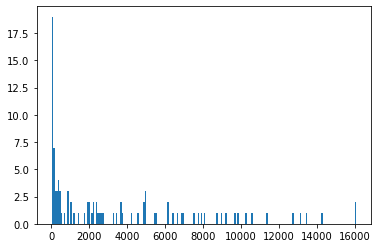

In [51]:
plt.hist(np.exp(20*distances), bins=200)

In [52]:
pd.DataFrame(np.exp(20*distances)).describe()

,0
count,100.000000
mean,3426.428223
std,4145.750000
min,19.678545
25%,166.629074
50%,1875.755188
75%,5446.083008
max,16061.512695


What are the prediction values of the masked image for the top prediction of the reference image, i.e. class 221, the Irish_water_spaniel?

In [53]:
preds[:,221]

array([2.44498282e-04, 3.88980661e-05, 7.58063397e-05, 1.13470232e-04,
       2.32723134e-04, 1.02449940e-05, 5.66061817e-06, 7.43154160e-05,
       1.38252787e-03, 1.10828623e-04, 3.18836246e-05, 8.39620861e-06,
       1.45141574e-04, 1.68684146e-05, 6.47804409e-05, 1.11377367e-05,
       3.90375535e-05, 2.84314119e-05, 5.47978698e-06, 4.95779059e-05,
       5.07436926e-05, 2.47734406e-05, 8.66814516e-04, 5.04904274e-05,
       7.68002006e-04, 1.39202421e-05, 3.90684494e-04, 4.43387486e-04,
       2.19818121e-05, 8.12065900e-06, 8.28121847e-05, 1.50560794e-04,
       5.62585155e-05, 4.73670407e-05, 2.18355373e-04, 4.39995056e-04,
       3.82955768e-05, 7.29606982e-05, 3.95375973e-05, 1.67770777e-04,
       1.74073393e-05, 1.89669790e-05, 7.54551074e-05, 1.75354347e-04,
       6.11530850e-05, 1.90583469e-05, 8.07519129e-04, 8.04244482e-05,
       3.10862583e-06, 1.05578438e-04, 3.44582331e-05, 5.75879007e-04,
       1.65153870e-05, 2.65281960e-05, 5.19971887e-04, 2.10229366e-04,
      

In [54]:
pd.DataFrame(preds[:,221]).describe()

,0
count,100.000000
mean,0.000154
std,0.000223
min,0.000003
25%,0.000024
50%,0.000075
75%,0.000194
max,0.001383


Ok, so pretty low, but still 2 orders of magnitude span.

What about a helicopter (or whatever, just index 1)?

In [55]:
class_name(1)

'goldfish'

Ok, goldfish it is

In [56]:
pd.DataFrame(preds[:,1]).describe()

,0
count,1.000000e+02
mean,4.009743e-05
std,1.410442e-04
min,6.331548e-08
25%,1.049011e-06
50%,3.838572e-06
75%,1.358993e-05
max,1.274475e-03


In [57]:
pd.DataFrame(preds[:,221]).describe()/pd.DataFrame(preds[:,1]).describe()

,0
count,1.000000
mean,3.838968
std,1.583670
min,44.566366
25%,23.008491
50%,19.508624
75%,14.281227
max,1.084782


Ok, disappointing, a goldfish is also pretty low, or just a bit lower, but not by that much compared to the top predictions.

What about the standard-poodle dimension?

In [58]:
pd.DataFrame(preds[:,267]).describe()

,0
count,100.000000
mean,0.178489
std,0.167919
min,0.002644
25%,0.059175
50%,0.111499
75%,0.265859
max,0.783328


That's more like the reference image.

So, now, what happens with these values to produce such limited/narrow ranges of values in the produced saliency maps? And also why do they not seem to explain much at all?

Let's try the dot product thingy on just one prediction to see what it does.

In [59]:
distances[0,None].T.dot(masks[0:1].reshape(1, -1)).reshape(-1, *model.input_size)

array([[[0.01175497, 0.0089891 , 0.00622322, ..., 0.24624731,
         0.25198146, 0.25771558],
        [0.01060815, 0.00811211, 0.00561608, ..., 0.24523541,
         0.25123939, 0.25724337],
        [0.00946132, 0.00723513, 0.00500893, ..., 0.24422352,
         0.25049732, 0.25677114],
        ...,
        [0.25656876, 0.25919972, 0.26183067, ..., 0.02200895,
         0.0161399 , 0.01027085],
        [0.25771558, 0.26007669, 0.26243782, ..., 0.02302086,
         0.01688197, 0.01074307],
        [0.25886241, 0.26095368, 0.26304496, ..., 0.02403277,
         0.01762403, 0.01121529]]])

In [60]:
distances[0]

array([0.26775032], dtype=float32)

In [61]:
masks[0:1].shape

(1, 224, 224, 1)

Based on the observation that the values of the cosine distance are all similar, combined with the fact that these are multiplied by the masks lead us to the hypothesis that this is the problem, namely that you're essentially just adding up the random masks without real strong meaningful "weights" (the distance values) to actually distinguish useful masks from useless ones.

Based on this realization, we hypothesized that blowing up the distances with a huge exponential would certainly solve matters. To test this properly, we have to also do it with more masks.

In [62]:
def explain4(model, inp, reference_inp, masks, batch_size=10):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    N = len(masks)
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
    preds = np.concatenate(preds)

    reference_pred = model.run_on_batch(reference_inp)
    distances = pairwise_distances(preds, reference_pred, metric='cosine') / 2
    distances = np.exp(20 * distances)
    print('distances.shape', distances.shape)

    sal = distances.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)

    sal = sal / N / p1
    return sal

In [63]:
s = 8
p1 = 0.5
masks4 = generate_masks(1000, s, p1)

Generating masks: 100%|██████████| 1000/1000 [00:03<00:00, 332.50it/s]


In [64]:
sal4 = explain4(model, x_dog1, x_dog2, masks4)

Explaining: 100%|██████████| 100/100 [01:11<00:00,  1.39it/s]


distances.shape (1000, 1)


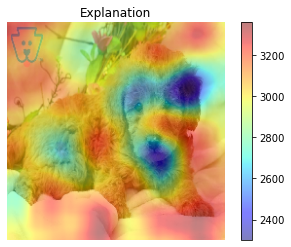

In [66]:
plt.title('Explanation')
plt.axis('off')
plt.imshow(img_dog1)
plt.imshow(sal4[0], cmap='jet', alpha=0.5) #, vmin=0, vmax=1)
plt.colorbar()
plt.show()

Hmm, ok, this is perhaps something like a pattern... is it stable though? Let's try another set of masks:

In [67]:
s = 8
p1 = 0.5
masks4_2 = generate_masks(1000, s, p1)

Generating masks: 100%|██████████| 1000/1000 [00:03<00:00, 331.58it/s]


In [71]:
sal4_2 = explain4(model, x_dog1, x_dog2, masks4_2)

Explaining: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


distances.shape (1000, 1)


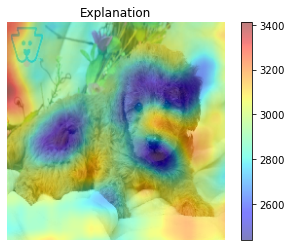

In [72]:
plt.title('Explanation')
plt.axis('off')
plt.imshow(img_dog1)
plt.imshow(sal4_2[0], cmap='jet', alpha=0.5) #, vmin=0, vmax=1)
plt.colorbar()
plt.show()

Hm, interesting, that is actually pretty similar... But what does it mean? Why are the parts that should bring it closer to the other image (furry ear, snout, furry haunch) low values?

Oh, is it because those are low distances?! :D

Maybe it is a good idea to invert the values, i.e. do 1/value, so that the scale is again inverted and at the same time it will be limited to [0,1] range.

In [85]:
def explain5(model, inp, reference_inp, masks, batch_size=10):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    N = len(masks)
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
    preds = np.concatenate(preds)

    reference_pred = model.run_on_batch(reference_inp)
    distances = pairwise_distances(preds, reference_pred, metric='cosine') / 2
    mask_weights = np.exp(-distances)
    print('weights.shape', mask_weights.shape)

    sal = mask_weights.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)

    normalization = mask_weights.sum()

    sal = sal / normalization
    return sal

In [73]:
sal5 = explain5(model, x_dog1, x_dog2, masks4)

Explaining: 100%|██████████| 100/100 [01:18<00:00,  1.27it/s]


distances.shape (1000, 1)


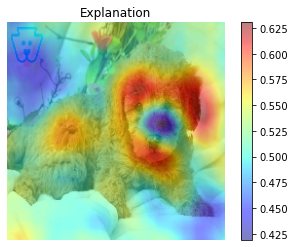

In [90]:
plt.title('Explanation')
plt.axis('off')
plt.imshow(img_dog1)
plt.imshow(sal5[0], cmap='jet', alpha=0.5) #, vmin=0, vmax=1)
plt.colorbar()
plt.show()

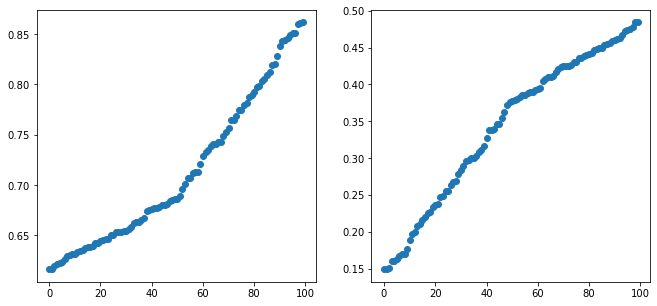

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(11,5))

ax[0].scatter(range(len(distances)), sorted(np.exp(-distances)))
ax[1].scatter(range(len(distances)), sorted(distances))

Ok, we've seen that the method so far produces maps that imply certain regions contribute to short distances to the other image. These regions seem stable under random mask generation. They sort of make sense as well, although other "doggy" parts are excluded, notably the part of the snout.

In a next notebook we will tidy up and look at other examples to allow us to understand the method better. Remaining questions include:
1. How can we interpret the range of values in the saliency map?
2. How can we compare values between different maps?
3. Is it possible to somehow standardize the range to [0,1], in a meaningful way?